In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('iris.data')
df.columns = ['sepal_len' , 'sepal_wid' , 'petal_len' , 'petal_wid' , 'label']
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,label
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [2]:
# 分為 data X 與 labels y
X = df.iloc[: , 0 : 4].values
y = df.iloc[: , 4].values

'petal_len'與'petal_wid'這兩個特徵在不同的label之間有比較明顯的分群<br>
而'sepal_len'與'sepal_wid'這兩個特徵在不同的label之間分群很不明顯，數據幾乎都疊在一起

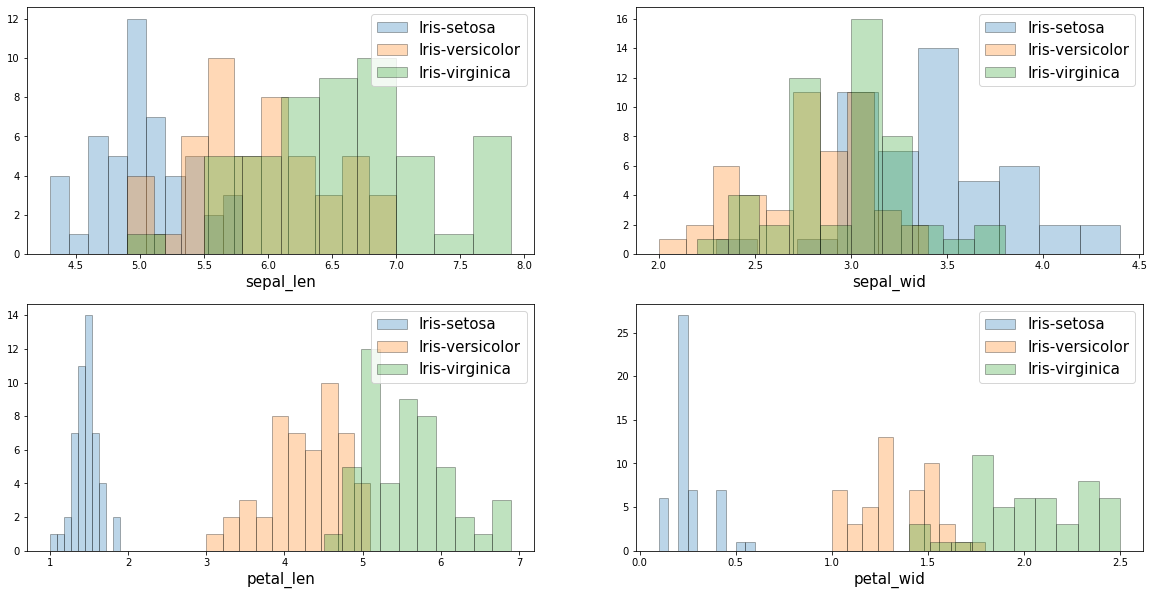

In [3]:
from matplotlib import pyplot as plt

# 對於每種feature都畫出其數據分布圖
# 而每種feature的數據分布圖都是根據不同label來畫
fig , ax = plt.subplots(2 , 2 , figsize = (20 , 10))
for i in range(0 , 2):
    for j in range(0 , 2):
        for label in ['Iris-setosa' , 'Iris-versicolor', 'Iris-virginica']:
            want2see_column = df.columns[2 * i + j]
            ax[i , j].hist(np.array(df.loc[df['label'] == label][want2see_column]) ,
                           bins = 10 , alpha = 0.3 ,
                           label = label ,
                           edgecolor = 'black')
        ax[i , j].legend(loc = 'upper right' , fontsize = 15)
        ax[i , j].set_xlabel(want2see_column , fontsize = 15)     

In [4]:
# 對數據做Normalization
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)
print(X_std)

[[-1.1483555  -0.11805969 -1.35396443 -1.32506301]
 [-1.3905423   0.34485856 -1.41098555 -1.32506301]
 [-1.51163569  0.11339944 -1.29694332 -1.32506301]
 [-1.02726211  1.27069504 -1.35396443 -1.32506301]
 [-0.54288852  1.9650724  -1.18290109 -1.0614657 ]
 [-1.51163569  0.8077768  -1.35396443 -1.19326436]
 [-1.02726211  0.8077768  -1.29694332 -1.32506301]
 [-1.75382249 -0.34951881 -1.35396443 -1.32506301]
 [-1.1483555   0.11339944 -1.29694332 -1.45686167]
 [-0.54288852  1.50215416 -1.29694332 -1.32506301]
 [-1.2694489   0.8077768  -1.23992221 -1.32506301]
 [-1.2694489  -0.11805969 -1.35396443 -1.45686167]
 [-1.87491588 -0.11805969 -1.52502777 -1.45686167]
 [-0.05851493  2.19653152 -1.46800666 -1.32506301]
 [-0.17960833  3.122368   -1.29694332 -1.0614657 ]
 [-0.54288852  1.9650724  -1.41098555 -1.0614657 ]
 [-0.90616871  1.03923592 -1.35396443 -1.19326436]
 [-0.17960833  1.73361328 -1.18290109 -1.19326436]
 [-0.90616871  1.73361328 -1.29694332 -1.19326436]
 [-0.54288852  0.8077768  -1.18

In [6]:
mean_vector = np.mean(X_std , axis = 0)
cov_matrix = (X_std - mean_vector).T.dot((X_std - mean_vector)) / (X_std.shape[0])
print('Covariance matrix :\n{}\n'.format(cov_matrix))
print('NumPy covariance matrix: :\n{}'.format(np.cov(X_std.T)))

Covariance matrix :
[[ 1.         -0.10378415  0.87128294  0.81697087]
 [-0.10378415  1.         -0.41521773 -0.35073314]
 [ 0.87128294 -0.41521773  1.          0.9623143 ]
 [ 0.81697087 -0.35073314  0.9623143   1.        ]]

NumPy covariance matrix: :
[[ 1.00675676 -0.10448539  0.87716999  0.82249094]
 [-0.10448539  1.00675676 -0.41802325 -0.35310295]
 [ 0.87716999 -0.41802325  1.00675676  0.96881642]
 [ 0.82249094 -0.35310295  0.96881642  1.00675676]]


In [8]:
cov_matrix = np.cov(X_std.T)

eig_values , eig_vectors = np.linalg.eig(cov_matrix)

print('Eigenvectors :\n{}\n'.format(eig_vectors))
print('\nEigenvalues : \n{}'.format(eig_values))

Eigenvectors :
[[ 0.52308496 -0.36956962 -0.72154279  0.26301409]
 [-0.25956935 -0.92681168  0.2411952  -0.12437342]
 [ 0.58184289 -0.01912775  0.13962963 -0.80099722]
 [ 0.56609604 -0.06381646  0.63380158  0.52321917]]


Eigenvalues : 
[2.92442837 0.93215233 0.14946373 0.02098259]


In [9]:
eig_pairs = {}
for i in range(0 , len(eig_values)):
    eig_pairs[eig_values[i]] = eig_vectors[: , i]
    
# 按照eig_value由大排到小
eig_pairs = sorted(eig_pairs.items() , key = lambda x: x[0] , reverse = True)

In [10]:
# 計算各個eig_value所佔的權重
total = sum(eig_values)

eig_weight = []
for i in eig_pairs:
    eig_weight.append(i[0] / total)

# 對權重進行累加    
cum_eig_weight = np.cumsum(eig_weight)

### 特徵值與特徵向量：
- 特徵向量：表示映射方向
- 特徵值：特徵向量的重要程度

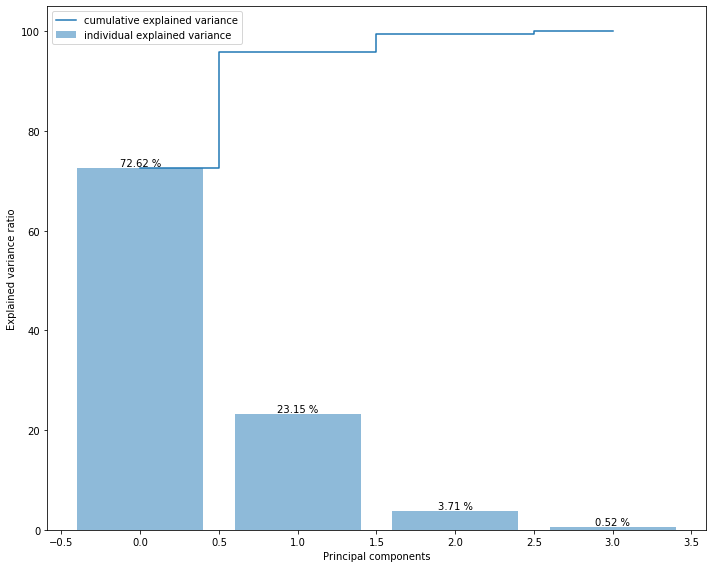

In [11]:
plt.figure(figsize = (10 , 8))

plt.bar(range(0 , 4) , 
        np.array(eig_weight) * 100 , 
        alpha = 0.5 , 
        align = 'center',
        label = 'individual explained variance')

for a , b in zip(range(4) , np.array(eig_weight) * 100):  
    plt.text(a , b + 0.005 , '{:.2f} %'.format(b), ha = 'center' , va = 'bottom' , fontsize = 10) 


plt.step(range(4) ,
         np.array(cum_eig_weight) * 100 ,
         where = 'mid' ,
         label = 'cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [12]:
# 取最大與次大的eig_value所對應的eig_vecctor，對X_std作線性變換
matrix_w = np.hstack((eig_pairs[0][1].reshape(4 , 1),
                      eig_pairs[1][1].reshape(4 , 1)))
print('Matrix W : \n{}\n'.format(matrix_w))

transform_X = X_std.dot(matrix_w)
print('Transform X : \n{}'.format(transform_X))

Matrix W : 
[[ 0.52308496 -0.36956962]
 [-0.25956935 -0.92681168]
 [ 0.58184289 -0.01912775]
 [ 0.56609604 -0.06381646]]

Transform X : 
[[-2.10795032  0.64427554]
 [-2.38797131  0.30583307]
 [-2.32487909  0.56292316]
 [-2.40508635 -0.687591  ]
 [-2.08320351 -1.53025171]
 [-2.4636848  -0.08795413]
 [-2.25174963 -0.25964365]
 [-2.3645813   1.08255676]
 [-2.20946338  0.43707676]
 [-2.17862017 -1.08221046]
 [-2.34525657 -0.17122946]
 [-2.24590315  0.6974389 ]
 [-2.66214582  0.92447316]
 [-2.2050227  -1.90150522]
 [-2.25993023 -2.73492274]
 [-2.21591283 -1.52588897]
 [-2.20705382 -0.52623535]
 [-1.9077081  -1.4415791 ]
 [-2.35411558 -1.17088308]
 [-1.93202643 -0.44083479]
 [-2.21942518 -0.96477499]
 [-2.79116421 -0.50421849]
 [-1.83814105 -0.11729122]
 [-2.24572458 -0.17450151]
 [-1.97825353  0.59734172]
 [-2.06935091 -0.27755619]
 [-2.18514506 -0.56366755]
 [-2.15824269 -0.34805785]
 [-2.28843932  0.30256102]
 [-2.16501749  0.47232759]
 [-1.8491597  -0.45547527]
 [-2.62023392 -1.84237072]

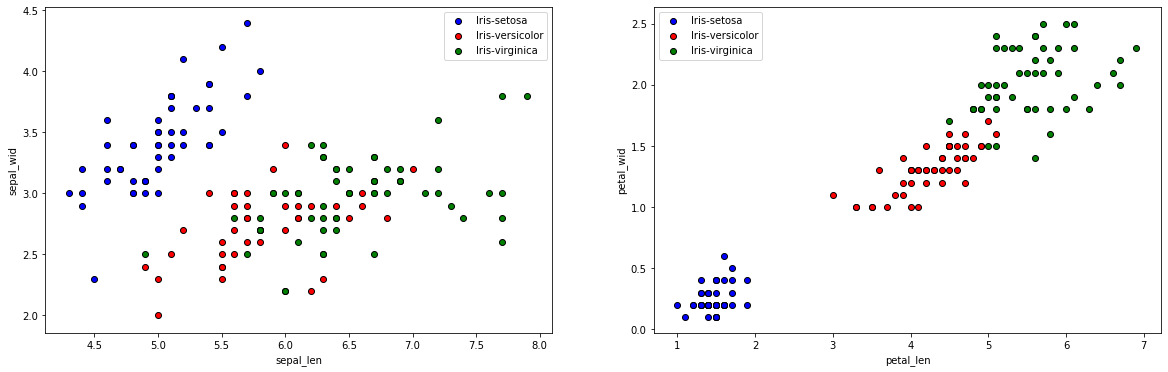

In [17]:
fig , ax = plt.subplots(1 , 2 , figsize = (20 , 6))

for lab , col in zip(['Iris-setosa', 'Iris-versicolor' , 'Iris-virginica'] , ['blue', 'red', 'green']):
     ax[0].scatter(X[y == lab , 0],
                   X[y == lab , 1],
                   label = lab,
                   c = col ,
                   edgecolor = 'black')
ax[0].set_xlabel('sepal_len')
ax[0].set_ylabel('sepal_wid')
ax[0].legend(loc = 'best')

for lab , col in zip(['Iris-setosa', 'Iris-versicolor' , 'Iris-virginica'] , ['blue', 'red', 'green']):
     ax[1].scatter(X[y == lab , 2],
                   X[y == lab , 3],
                   label = lab,
                   c = col ,
                   edgecolor = 'black')
ax[1].set_xlabel('petal_len')
ax[1].set_ylabel('petal_wid')
ax[1].legend(loc = 'best')

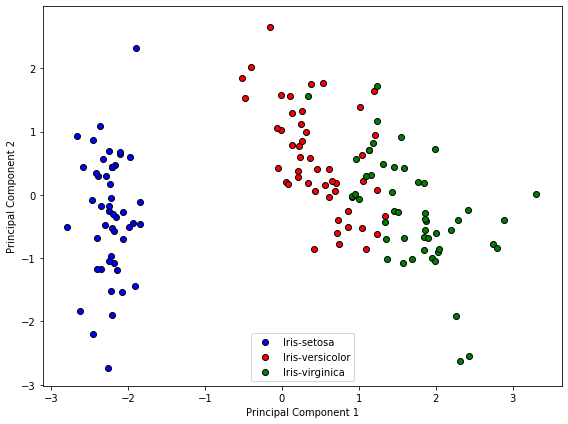

In [18]:
plt.figure(figsize = (8 , 6))
for lab , col in zip(['Iris-setosa', 'Iris-versicolor' , 'Iris-virginica'] , ['blue', 'red', 'green']):
     plt.scatter(transform_X[y == lab , 0],
                 transform_X[y == lab , 1],
                 label = lab,
                 c = col ,
                 edgecolor = 'black')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

相較於原本沒作PCA的資料，可以看到作PCA處理後，'Iris-versicolor'與'Iris-virginica'明顯被分開了